# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats

import sklearn
from sklearn.linear_model import LinearRegression

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# 0.1 Help Functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()


In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# Capítulo 4 Modelo Clássico de Regressão Linear Normal

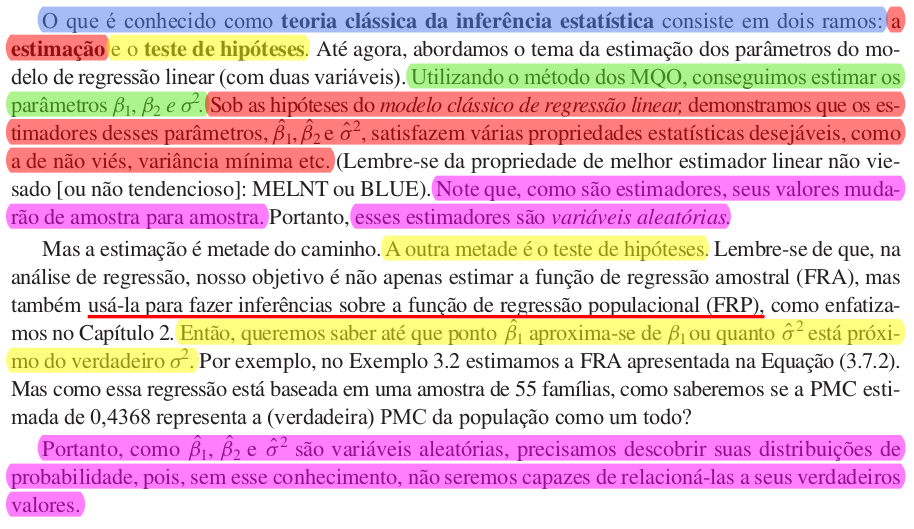

In [5]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_04_intro.png')

## 4.2 Hipótese de normalidade de $ {u}_i $

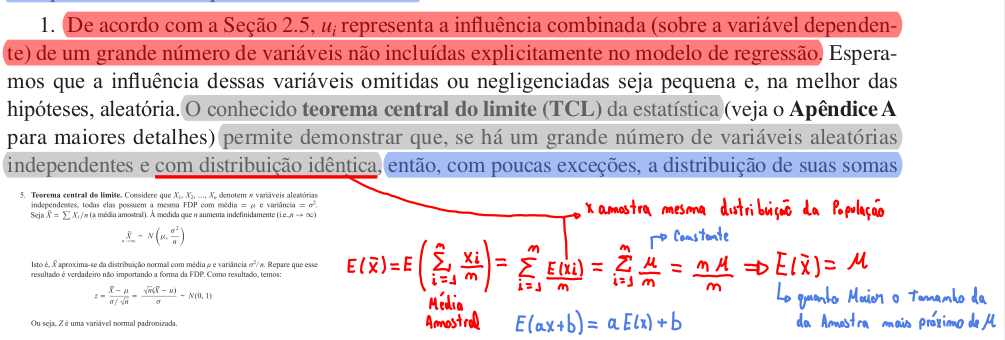

In [6]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/erro_1.png')

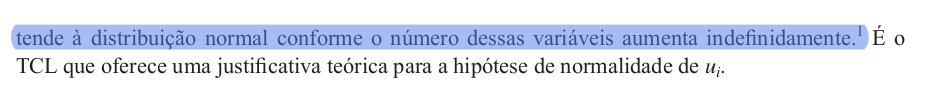

In [18]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/erro_2.png')

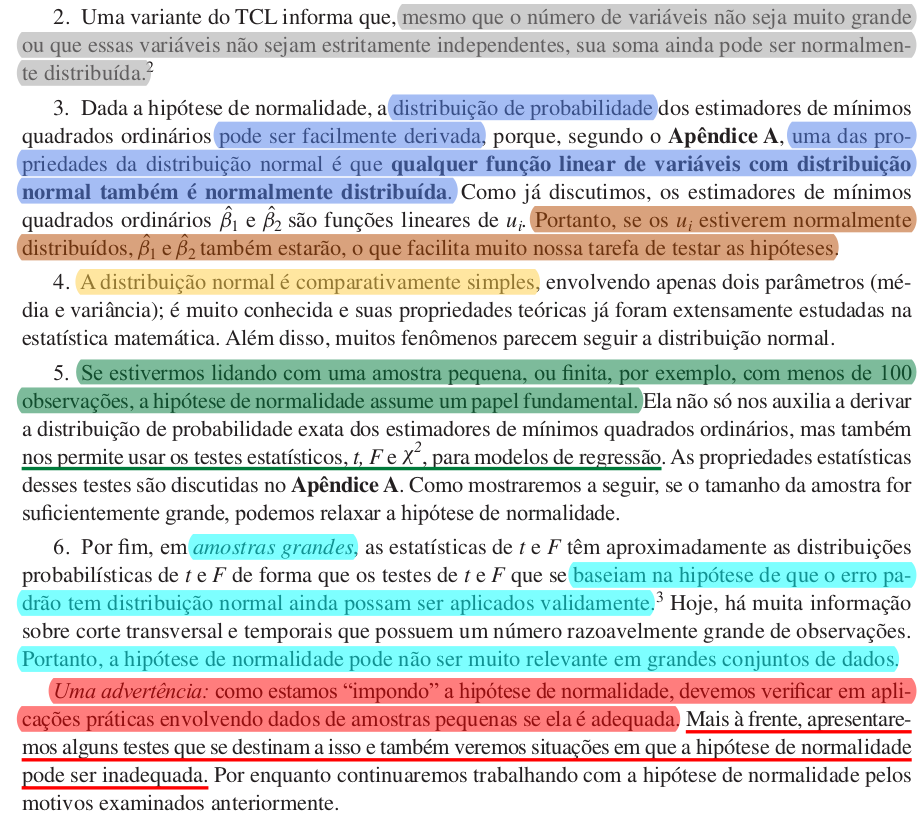

In [19]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/erro_3.png')

# 1.0 Teorema central do Limite

## Distribuição Normal

### Simulação aleatória distribuição normal

In [22]:
# media mu
mu = 0

#desvio padrao
sigma = 1

#numero de amostras
n = 3

#tamanho da amostra
m = 4

for i in range( 0, n ):
    x = np.random.normal( mu, sigma, m )
    print('Amostra', i, ':' , x )

Amostra 0 : [ 0.85916677  0.21285461 -1.53206956 -0.80962332]
Amostra 1 : [0.33466075 0.11073068 0.73836642 1.20418423]
Amostra 2 : [ 1.81684558  1.35294735 -1.02741378  0.33156592]


### Calcular o valor médio de 10 amostras de tamanhos crescentes 

amostra 1 = 1  elemento  
amostra 2 = 11 elementos  
amostra 3 = 21 elementos  
amostra 4 = 31 elementos

In [45]:
vn = []
vmean = []

#media mu
mu = 0

#desvio padrao
std = 1

for n in np.arange( 1, 100, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.normal( mu, std, n) # X é gerado de uma distribuicao normal
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)

print('\nNúmero de amostras: {}'.format( len(vn) ) )

print('\nQuantidade de elementos de cada amostra\n')
print(vn)

print('\nMédia de cada amostra\n')
print(vmean)


Número de amostras: 10

Quantidade de elementos de cada amostra

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

Média de cada amostra

[-1.7838936998677517, 0.27187284829622294, -0.21441758350906678, -0.48477228457062865, -0.16974687238178401, -0.08877441426622341, 0.14384772848541366, 0.08990478188951229, 0.04809611827513698, 0.010313930724476917]


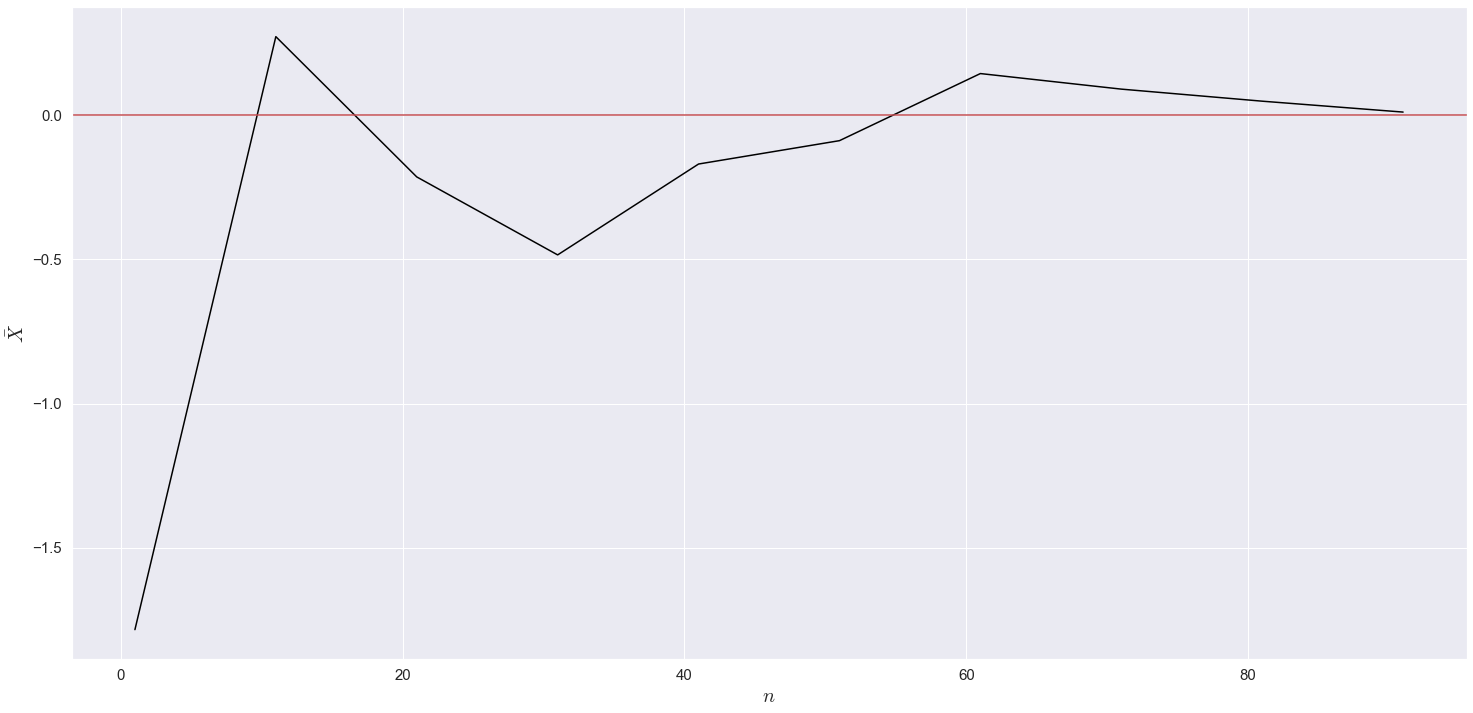

In [46]:
# gráfico médias das amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = mu, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$\bar{X}$', fontsize = 20 )
plt.show(True)

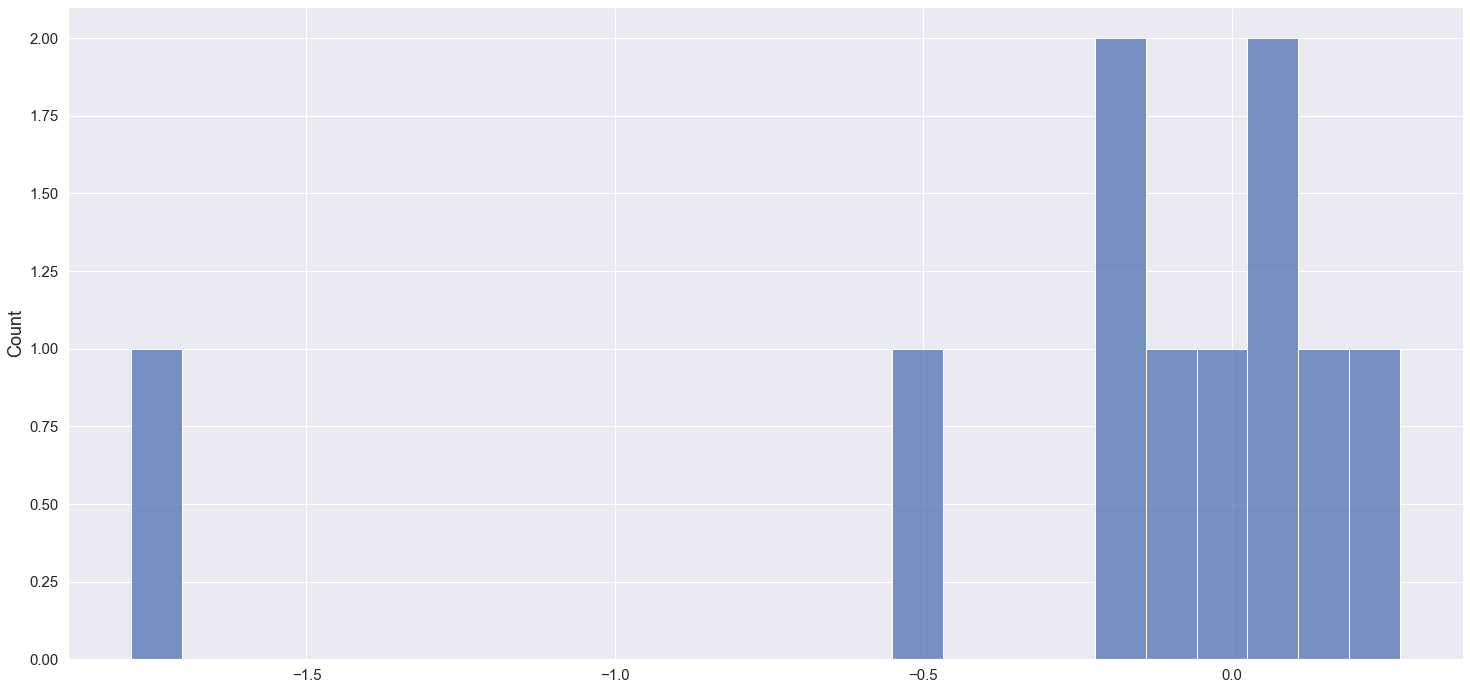

In [48]:
# histograma distribuição das medias das 10 amostras
sns.histplot(data = vmean, bins = 25);

### Calcular o valor médio de 100 amostras de tamanhos crescentes 

amostra 1 = 1  elemento  
amostra 2 = 11 elementos  
amostra 3 = 21 elementos  
amostra 4 = 31 elementos

In [50]:
vn = []
vmean = []

#media mu
mu = 0

#desvio padrao
std = 1

for n in np.arange( 1, 1000, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.normal( mu, std, n) # X é gerado de uma distribuicao normal
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)

print('\nNúmero de amostras: {}'.format( len(vn) ) )

print('\nQuantidade de elementos de cada amostra\n')
print(vn)

print('\nMédia de cada amostra\n')
print(vmean)


Número de amostras: 100

Quantidade de elementos de cada amostra

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511, 521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641, 651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771, 781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901, 911, 921, 931, 941, 951, 961, 971, 981, 991]

Média de cada amostra

[-0.6393258626649733, 0.3396231717806002, -0.22359810902479738, 0.11582143014228084, 0.21863324403498785, 0.019257469919554914, -0.1116699917972872, 0.18996230315690105, 0.018851466051381167, 0.012933096179648804, 0.07440833994963611, -0.0622648831043629, 0.1408341852474453, 0.13691152960214883, -0.10226619184752554, 0.029016584912281658, 0.05273759391127199, -0.07558341526063272, 0.12537349608094736, 0.135334034261

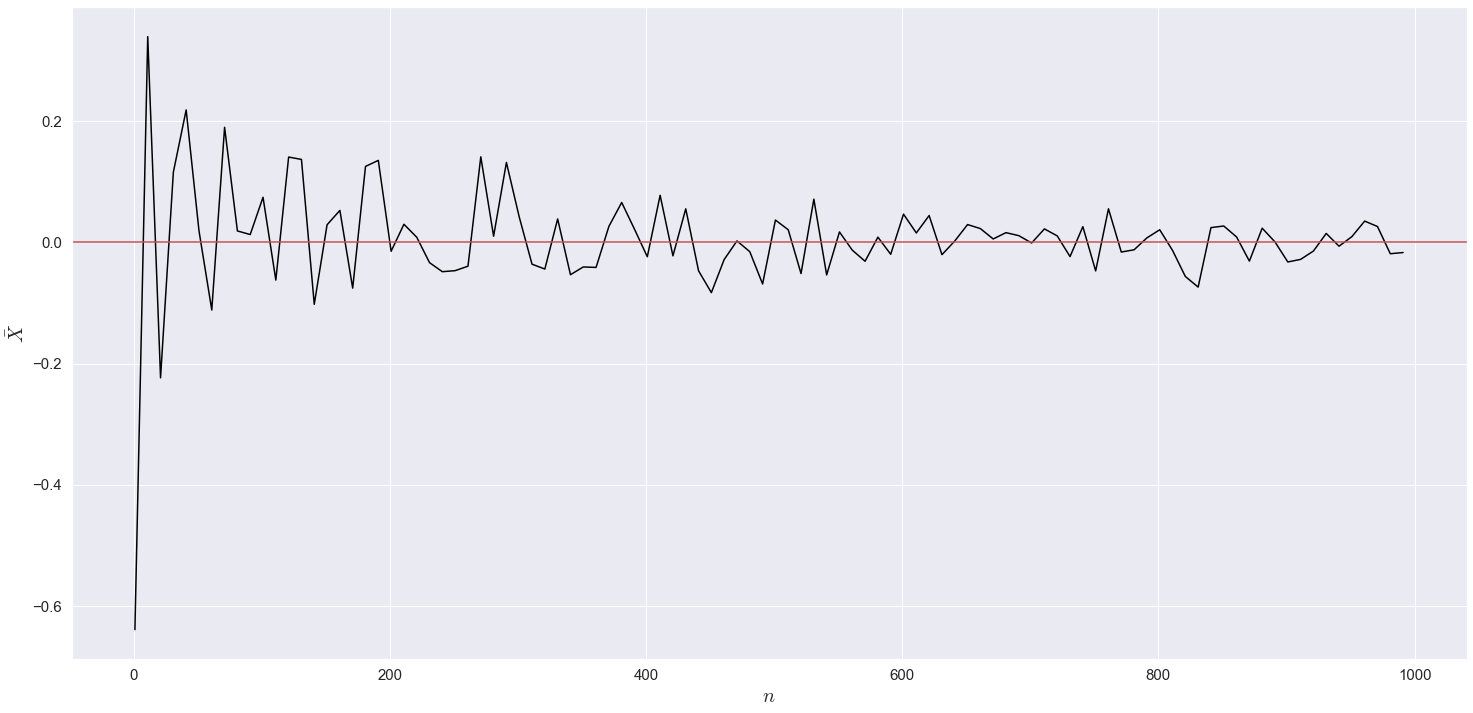

In [51]:
# gráfico médias das amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = mu, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$\bar{X}$', fontsize = 20 )
plt.show(True)

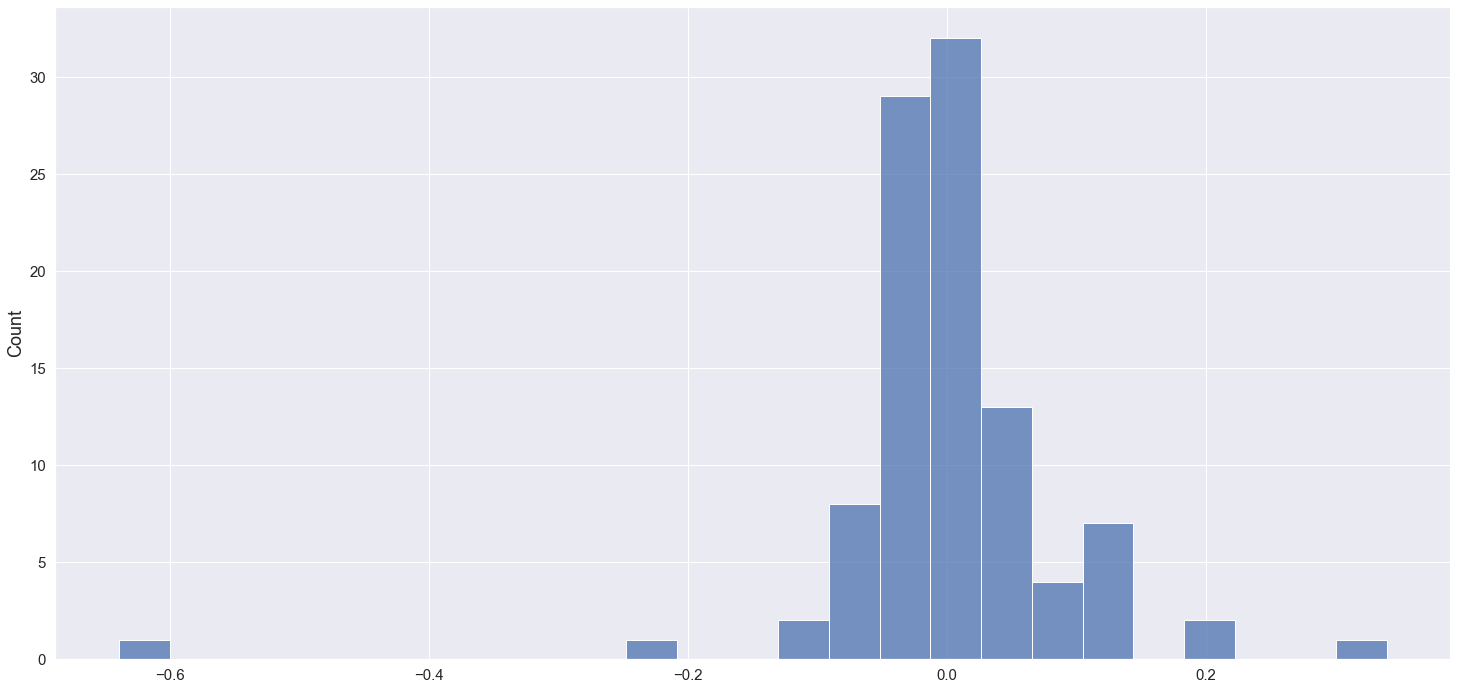

In [52]:
# histograma distribuição das medias das 100 amostras
sns.histplot(data = vmean, bins = 25);

### Calcular o valor médio de 1000 amostras de tamanhos crescentes 

In [54]:
vn = []
vmean = []
#media mu
mu = 0
#desvio padrao
std = 1

for n in np.arange( 1, 10000, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.normal( mu, std, n) # X é gerado de uma distribuicao normal
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 
    
print('\nNúmero de amostras: {}'.format( len(vn) ) )



Número de amostras: 1000


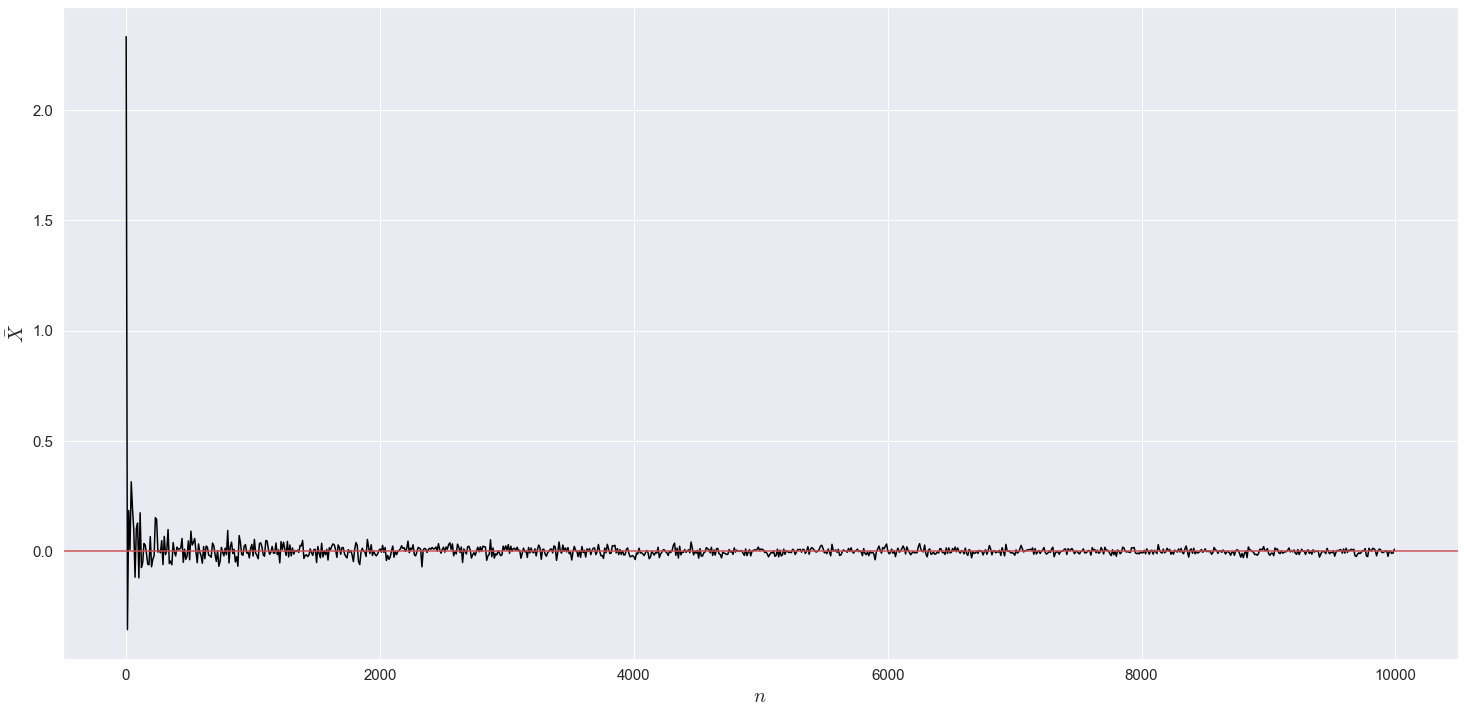

In [55]:
# gráfico médias das amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = mu, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$\bar{X}$', fontsize = 20 )
plt.show(True)

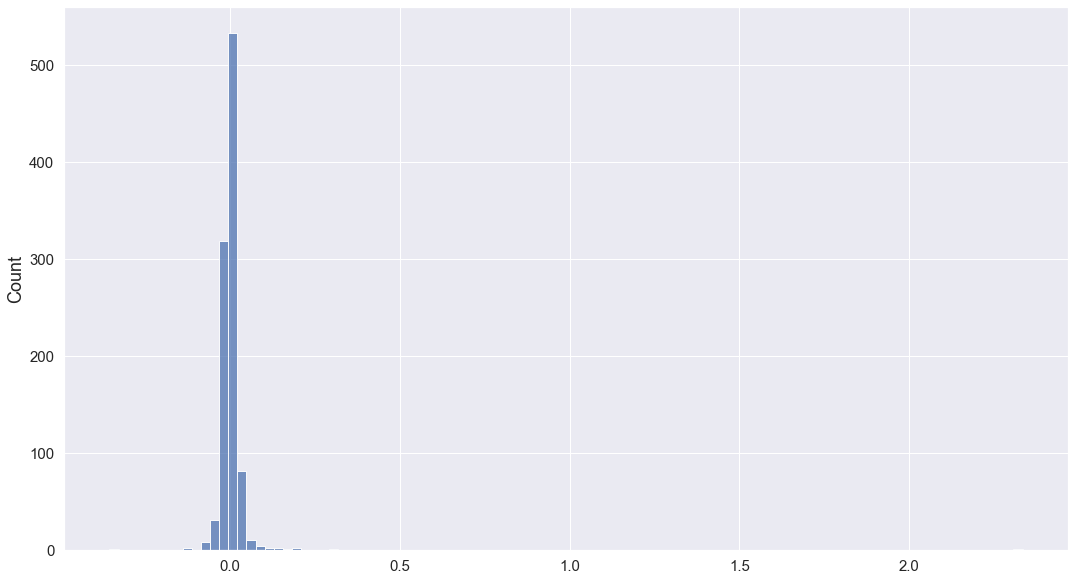

In [62]:
figure = figsize(18,10)
# histograma distribuição das medias das 100 amostras
sns.histplot(data = vmean, bins = 100);

### Calcular o valor médio de 10000 amostras de tamanhos crescentes 

In [63]:
vn = []
vmean = []
#media mu
mu = 0
#desvio padrao
std = 1

for n in np.arange( 1, 100000, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.normal( mu, std, n) # X é gerado de uma distribuicao normal
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 
    
print('\nNúmero de amostras: {}'.format( len(vn) ) )



Número de amostras: 10000


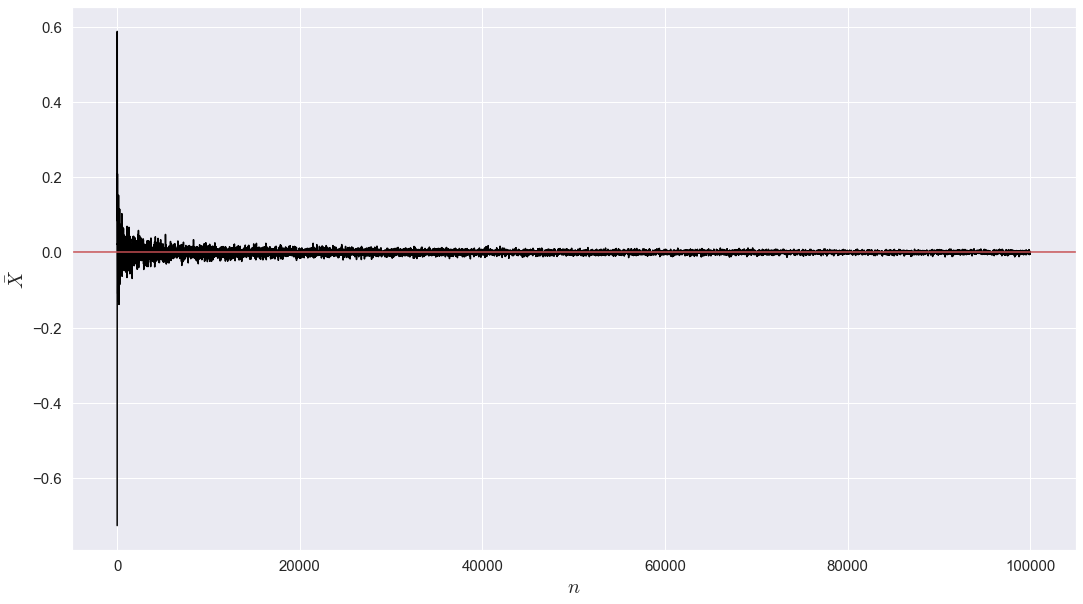

In [64]:
# gráfico médias das amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = mu, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$\bar{X}$', fontsize = 20 )
plt.show(True)

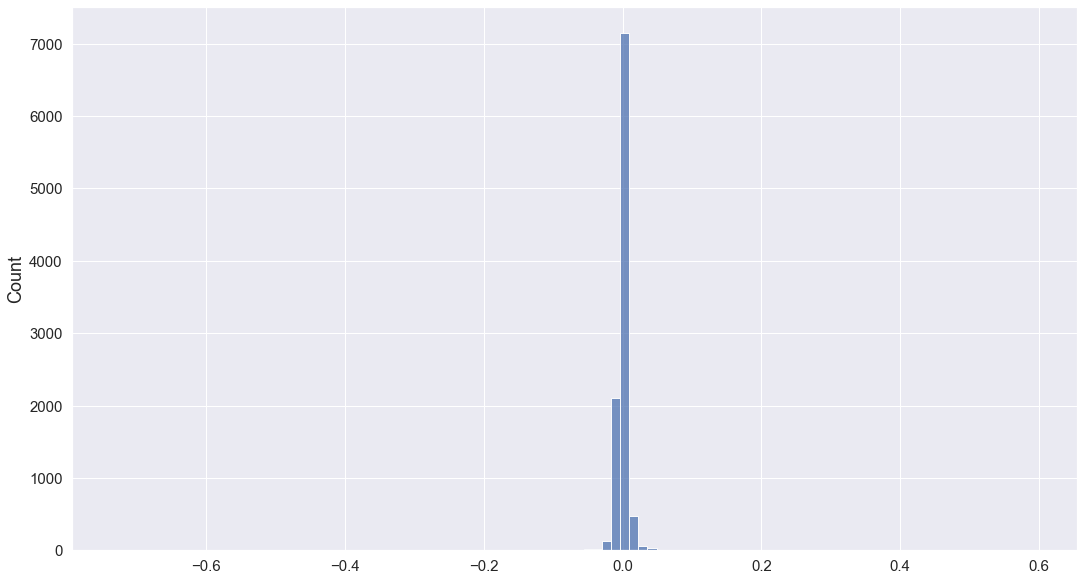

In [65]:
figure = figsize(18,10)
# histograma distribuição das medias das 100 amostras
sns.histplot(data = vmean, bins = 100);

## Distribuição Exponencial

### Simulação Aleatória Distribuição Exponencial

In [66]:
#lambda lb
lb = 2

#numero de amostras
n = 3

for i in range( 0, n ):
    x = np.random.exponential( lb, n)
    print('Amostra', i, ':' , x )

Amostra 0 : [3.53831673 0.56813961 0.16738055]
Amostra 1 : [0.15850475 0.60895562 1.74529719]
Amostra 2 : [1.4643741  0.38832172 0.36416206]


### Calcular valor das médias dos lambdas das 10 amostras

In [71]:
vn = []
vmean = []

#lambda lb
lb = 2

for n in np.arange( 1, 100, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.exponential( lb, n) # X é gerado de uma distribuicao exponencial
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 

print('\nNúmero de amostras: {}'.format( len(vn) ) )

print('\nQuantidade de elementos de cada amostra\n')
print(vn)

print('\nMédia do lambda de cada amostra\n')
print(vmean)



Número de amostras: 10

Quantidade de elementos de cada amostra

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

Média do lambda de cada amostra

[0.16411839060322117, 2.2510970999151927, 1.9032608041616998, 1.4904562154749936, 2.240032421754393, 1.6775984104632653, 2.2876734014994087, 2.173957338316803, 1.9287778917680134, 2.036328296278896]


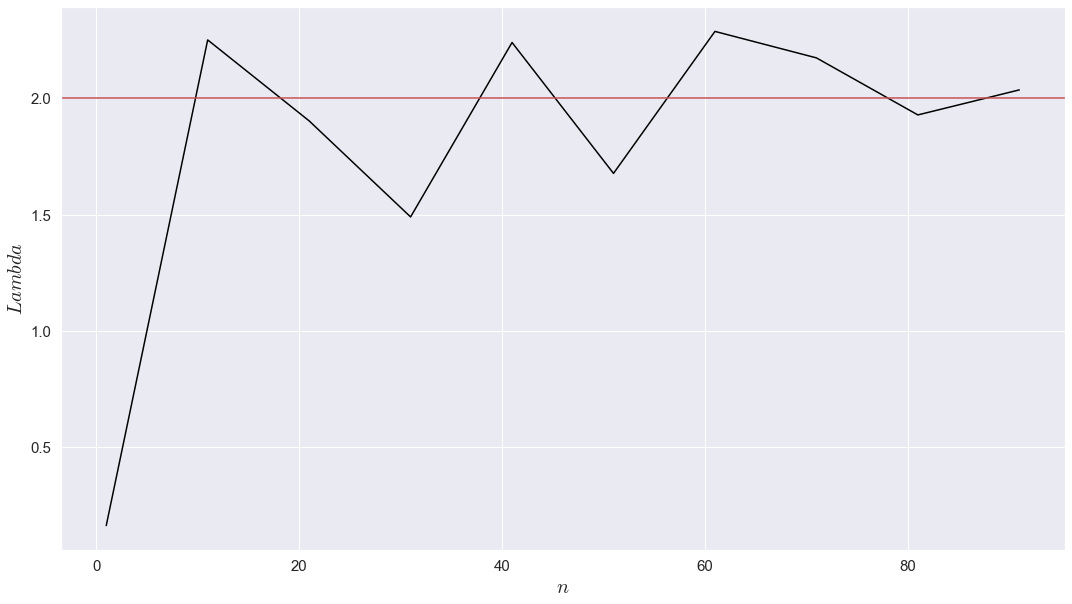

In [72]:
# grafico media dos lambdas das 10 amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = lb, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$Lambda$', fontsize = 20 )
plt.show(True)

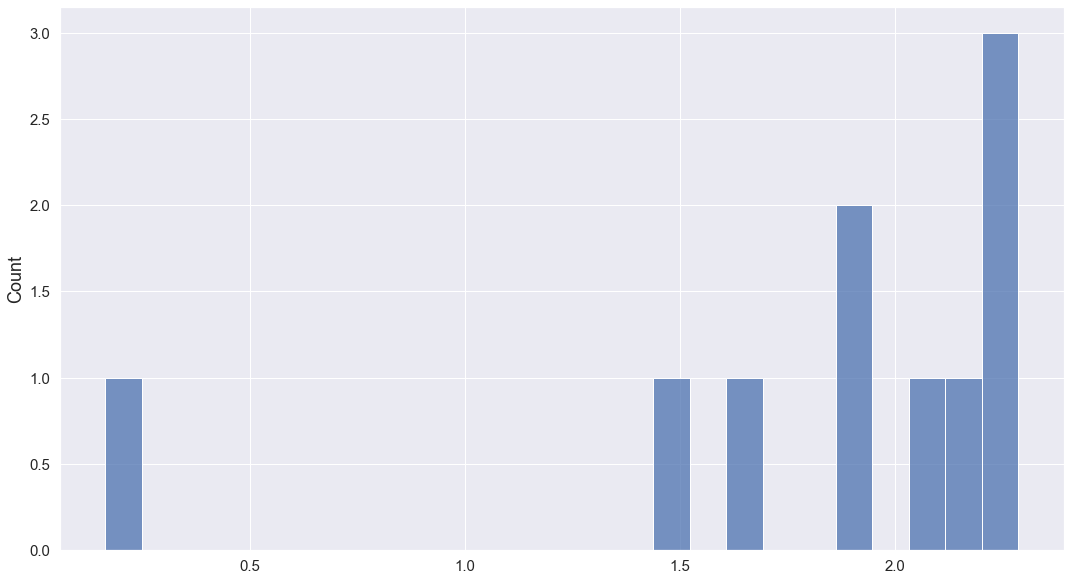

In [73]:
sns.histplot(data = vmean, bins = 25);

### Calcular valor das médias dos lambdas das 100 amostras

In [74]:
vn = []
vmean = []

#lambda lb
lb = 2

for n in np.arange( 1, 1000, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.exponential( lb, n) # X é gerado de uma distribuicao exponencial
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 

print('\nNúmero de amostras: {}'.format( len(vn) ) )

print('\nQuantidade de elementos de cada amostra\n')
print(vn)

print('\nMédia do lambda de cada amostra\n')
print(vmean)



Número de amostras: 100

Quantidade de elementos de cada amostra

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511, 521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641, 651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771, 781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901, 911, 921, 931, 941, 951, 961, 971, 981, 991]

Média do lambda de cada amostra

[0.7708820908925295, 1.6381206458367679, 2.213280417490774, 1.9811326239854035, 2.1301173806158578, 2.300450917267114, 1.7994101309010133, 2.184357318318842, 2.080716307201705, 2.2475511295366846, 1.8186232279999852, 1.7535120374117306, 1.7861199000272323, 1.8403271543871975, 1.8068324192715024, 2.1446966480042677, 1.897929880495297, 1.941076835640359, 2.2048721941963554, 1.9152183905919733, 1.900045231826

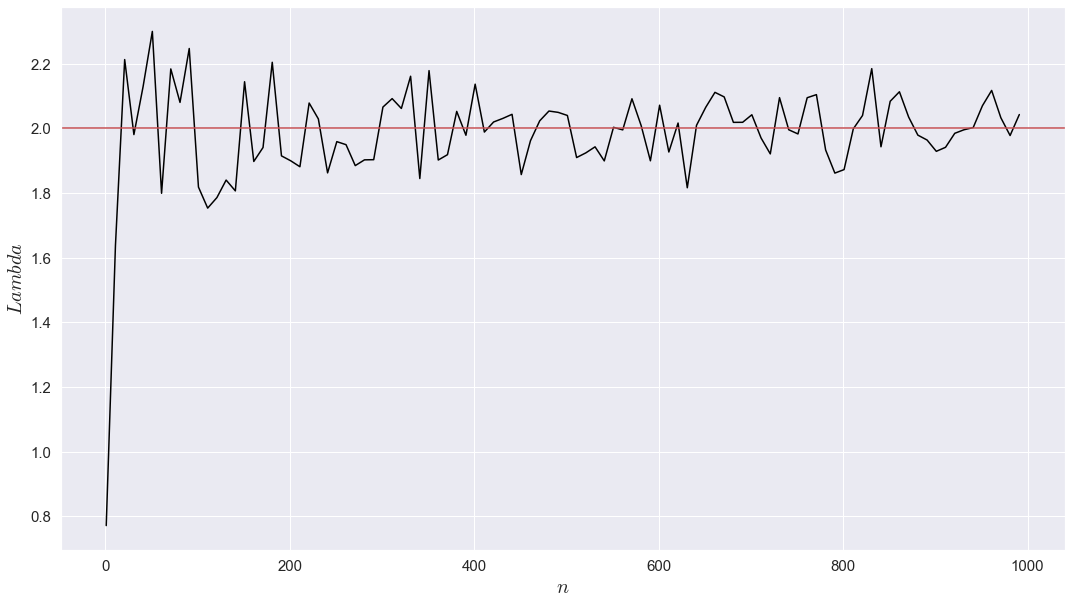

In [75]:
# grafico media dos lambdas das 10 amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = lb, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$Lambda$', fontsize = 20 )
plt.show(True)

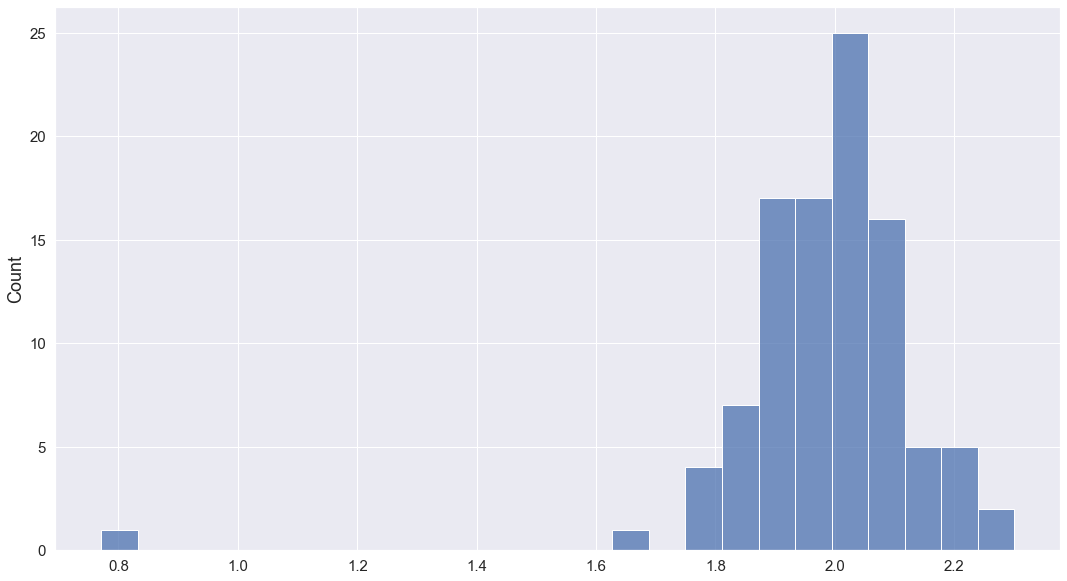

In [76]:
sns.histplot(data = vmean, bins = 25);

### Calcular valor das médias dos lambdas das 1000 amostras

In [81]:
vn = []
vmean = []

#lambda lb
lb = 2

for n in np.arange( 1, 10000, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = np.random.exponential( lb, n) # X é gerado de uma distribuicao exponencial
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 

print('\nNúmero de amostras: {}'.format( len(vn) ) )


Número de amostras: 1000


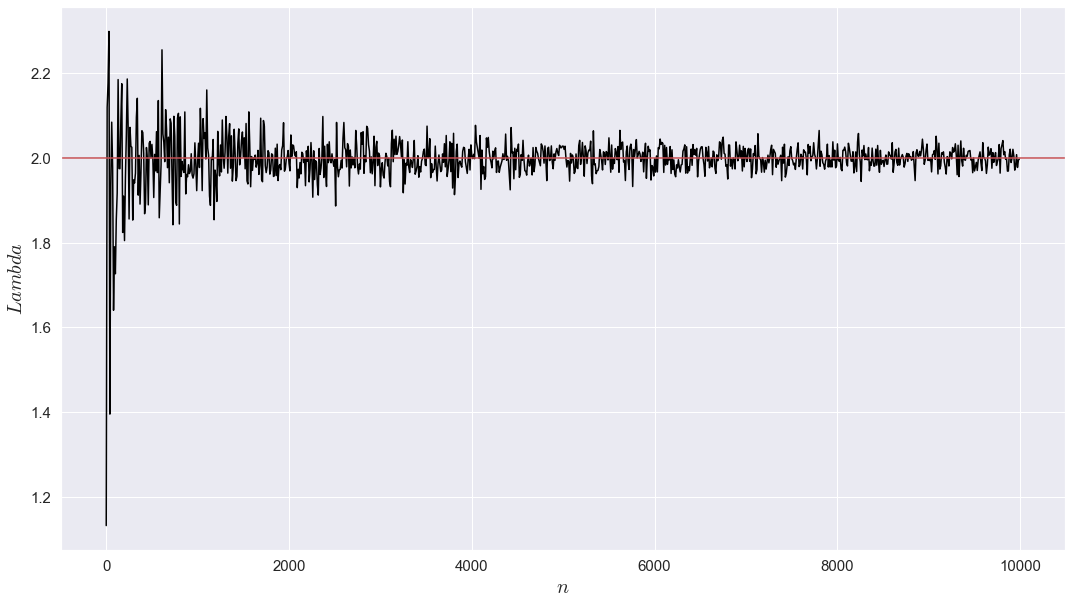

In [82]:
# grafico media dos lambdas das 10 amostras
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = lb, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$Lambda$', fontsize = 20 )
plt.show(True)

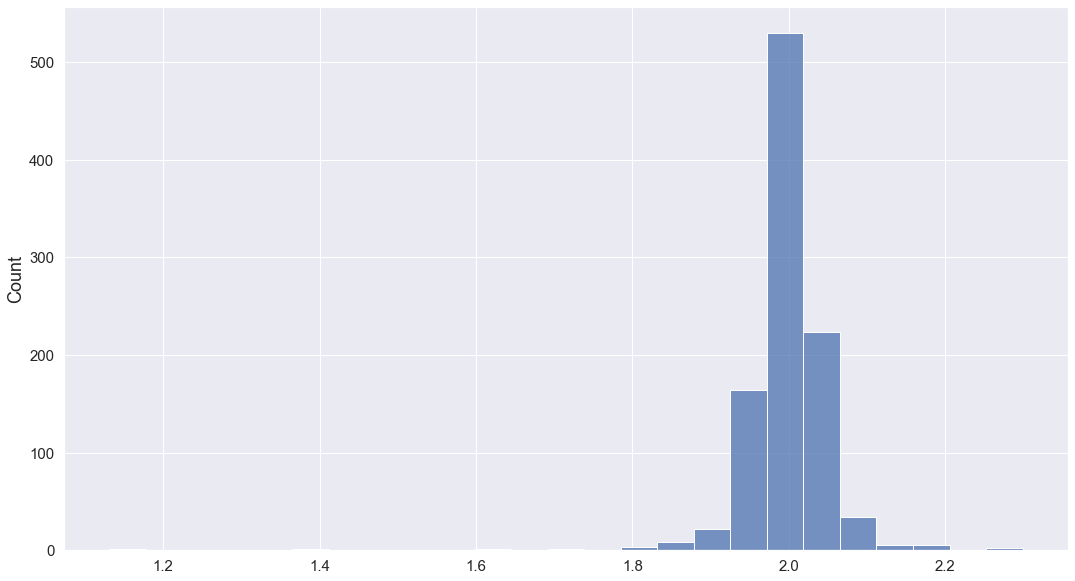

In [83]:
sns.histplot(data = vmean, bins = 25);

## Distribuição de Poisson

### Simulação Aleatória Distribuição de Poisson

In [84]:
vn = []
vmean = []
#lambda
lb = 2
# numero de amostras
n = 3

for i in range( 0, n):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    x = stats.poisson.rvs( lb, size = n) # X é gerado de uma distribuicao poisson
    print('Amostra', i, ':' , x )

Amostra 0 : [2 1 0]
Amostra 1 : [2 3 3]
Amostra 2 : [2 1 2]


In [85]:
### Calcular valor das médias dos lambdas das 1000 amostras

In [86]:
vn = []
vmean = []
#lambda
lb = 2

for n in np.arange( 1, 10000, 10):    # amostra1= 1 elementos -> amostra 2 = 11 elementos -> amostra3 = 21 elementos
    X = stats.poisson.rvs( lb, size = n) # X é gerado de uma distribuicao poisson
    vmean.append( np.mean(X) )        # Calcula a media amostral e armazena 
    vn.append(n)                      # 

print('\nNúmero de amostras: {}'.format( len(vn) ) )    


Número de amostras: 1000


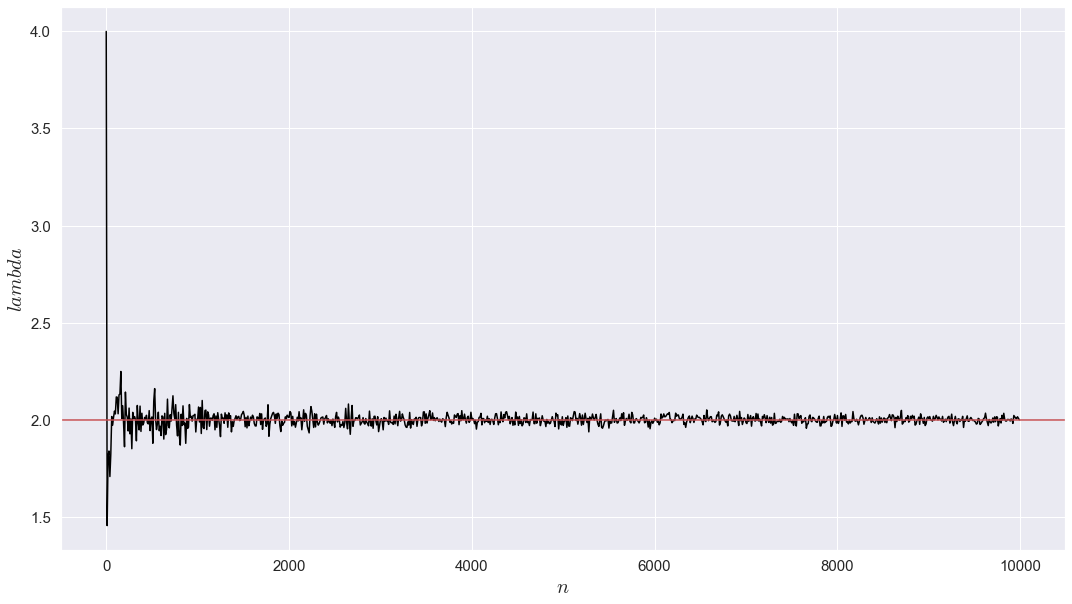

In [87]:
# grafico
plt.plot( vn, vmean, '-', color = 'black' )
plt.axhline( y = lb, color = 'r', linestyle = '-' )
plt.xlabel( r'$n$', fontsize = 20 )
plt.ylabel(r'$lambda$', fontsize = 20 )
plt.show(True)

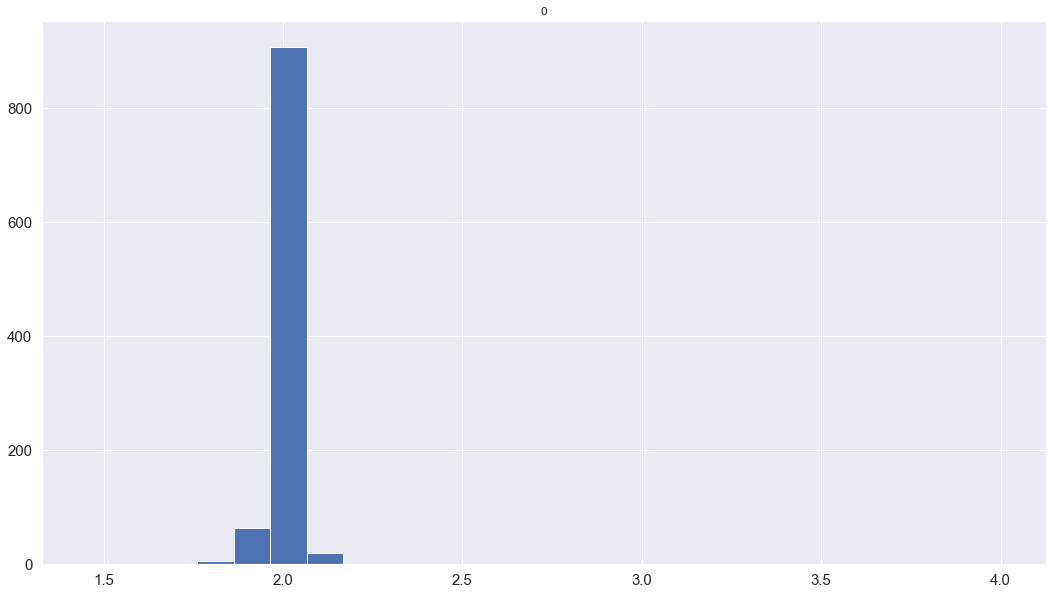

In [88]:
# 10000
vmean = pd.DataFrame( vmean)
vmean.hist(bins=25);